### Conceptos básicos

La probabilidad de A dado B significa la probabiliad de que pase A una vez que ya sabemos que B pasó, se usa la notación
$$P(A|B)=\frac{P(A\cap B)}{P(B)}$$
Si despejamos podemos obtener $$P(A\cap B)=P(A|B)P(B)$$
$$P(B\cap A)=P(B|A)P(A)$$
Recordemos que dos eventos son independientes sii
$$P(A|B)=P(A)$$
Fijándonos en la ecuación de arriba eso resulta en 
$$P(A\cap B)=P(A)P(B)$$
El teorema de Bayes nos dice que 
$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$

Un caso particular de ese teorema es cuando $A=A_1$ pertenece a una partición y podemos hacer
$$P(A_1|B)=\frac{P(B|A_1)P(A_1)}{P(B|A_1)P(A_1)+\cdots+P(B|A_n)P(A_n)}$$

---

#### Ejemplo cajas de galletas

---



---



---


Caja 1= 10 galletas de chocolate \\
Caja 2= 5 galletas de chocolate y 5 galletas de coco \\
Vamos a tomar una galleta sin ver y queremos obtener lo siguiente.

$P(Caja1 | Chocolate)$ \\
La probabilidad que la galleta obtenida sea de la caja1 si sabemos que es de chocolate


$P(Caja1 | Chocolate)=\frac{P(Chocolate|Caja1)P(Caja1)}{P(Chocolate)}$ \\
$P(Chocolate | Caja1)=1$ \\
$ P(Chocolate|Caja2)=1/2$ \\
La siguientes probas son 1/2 porque la galleta la tomamos de una caja sin ver \\
$P(Caja1)=1/2$ \\
$P(Caja2)=1/2$ \\
$P(Chocolate)=P(Chocolate|Caja1)P(Caja1) + P(Chocolate|Caja2)P(Caja2)=1*1/2+1/2*1/2=3/4$


$P(Caja1 | Chocolate)=\frac{1*1/2}{3/4}=4/6=2/3$

---

### Terminología Bayes
$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$
$P(A)$ priori. \\
$P(B|A)$ likelihood. \\
$P(B)$ marginal. \\
$P(A|B)$ posteriori. \\

In [48]:
import numpy as np

In [49]:
priors = [1/2, 1/2]
likelihoods = [1, 1/2]
#np.multiply(priors, likelihoods) = [1/2, 1/4]
def bayes(priors, likelihoods):
  marginal = sum(np.multiply(priors, likelihoods))
  num = np.multiply(priors, likelihoods)
  posteriori = np.divide(num, marginal)
  return posteriori

In [50]:
bayes(priors, likelihoods)

array([0.66666667, 0.33333333])

### Bayes en medicina
Primero veamos terminología que no será de utilidad un poco más adelante

![Sensib/especif](https://pbs.twimg.com/media/EV-bnxjUwAcZW_B.jpg)

P(A | B) = 1 - P(A|not B) = 1 - (1-P(not A| not B)) = P(not A| not B)

P(A)=P(A)P(A|B) + P(A)P(A|not B)=P(A)[P(A|B) + P(A|not B)]

P(A) = P(A)[P(A|B) + P(A|not B)]

Supongamos que tenemos una prueba que nos ayuda a identificar si una persona ha consumido o no alguna droga específica. \\
Sabiendo lo de arriba vamos a crear una función que nos ayude a calcular la probabilidad de que una persona consumiera drogas, dado que la prueba sale positiva, elgunas probabilidades importantes son:

---
$P(usuario | positivo)=\frac{P(positivo|usuario)P(usuario)}{P(postivo)}$ \\
$P(positivo)$ = P(positivo | usuario)*P(usuario) + P(positivo | no\; usuario)*P(no\; usuario) \\
$P(positivo | usuario)=$ Sensibilidad \\
$P(positivo | no\; usuario)=1-P(negativo | no\;usuario)$ \\
$P(negativo | no\;usuario)$ =Especificidad \\
$P(usuario)=$ Prevalencia


In [51]:
def proba_usuario(flag = 0.5, sensibilidad = 0.99, especificidad = 0.99, preval = 0.01, verbose = False):

  prob_usuario = preval
  prob_no_usuario = 1 - preval

  prob_positivo_usuario = sensibilidad
  prob_negativo_no_usuario = especificidad
  prob_negativo_usuario = 1 - sensibilidad
  prob_positivo_no_usuario = 1 - especificidad

  prob_positivo = prob_positivo_usuario*prob_usuario + prob_positivo_no_usuario*prob_no_usuario
  num = prob_positivo_usuario*prob_usuario
  proba_posteriori = num/prob_positivo

  if verbose:
    if proba_posteriori > flag:
      print("Que paso ai sharli")

    else:
      print("Ah pos nocierto que ingieres")

  return proba_posteriori

In [52]:
import matplotlib.pyplot as plt

In [53]:
proba_usuario(sensibilidad = .95, especificidad = 0.95, preval = 0.01)

0.16101694915254225

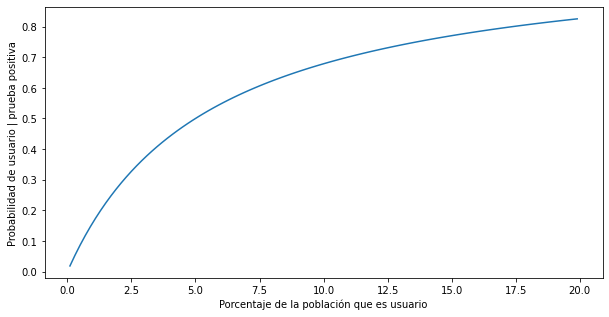

In [54]:
probabilidades = []
prevalencias = []
for preva in [i*.001 for i in range(1,201,2)]:
    prevalencias.append(preva*100)
    p=proba_usuario(sensibilidad = 0.95, especificidad = 0.95, preval = preva)
    probabilidades.append(p)
plt.figure(figsize=(10, 5),facecolor='w')
plt.plot(prevalencias, probabilidades)
plt.xlabel('Porcentaje de la población que es usuario')
plt.ylabel('Probabilidad de usuario | prueba positiva')
plt.show()

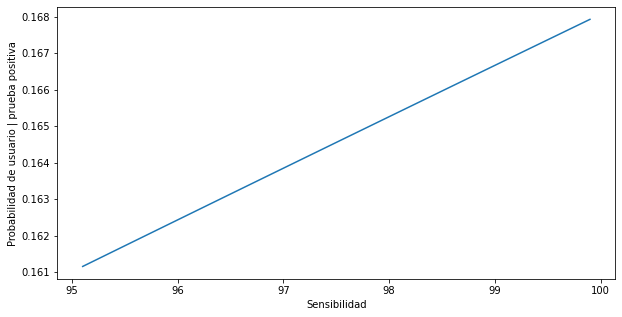

In [55]:
probabilidades = []
sensibilidades = []
for sensib in [i*.001+0.95 for i in range(1,51,2)]:
    sensibilidades.append(sensib*100)
    p=proba_usuario(sensibilidad = sensib, especificidad = 0.95, preval = 0.01)
    probabilidades.append(p)
plt.figure(figsize=(10, 5),facecolor='w')
plt.plot(sensibilidades, probabilidades)
plt.xlabel('Sensibilidad')
plt.ylabel('Probabilidad de usuario | prueba positiva')
plt.show()

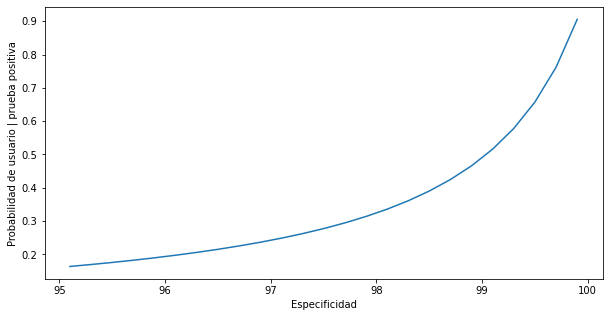

In [56]:
probabilidades = []
especificidades = []
for especif in [i*.001+0.95 for i in range(1,51,2)]:
    especificidades.append(especif*100)
    p=proba_usuario(sensibilidad = 0.95, especificidad = especif, preval = 0.01)
    probabilidades.append(p)
plt.figure(figsize=(10, 5),facecolor='w')
plt.plot(especificidades, probabilidades)
plt.xlabel('Especificidad')
plt.ylabel('Probabilidad de usuario | prueba positiva')
plt.show()

In [57]:
p = proba_usuario(sensibilidad=0.95, especificidad=0.95, preval=0.005, verbose=True)

Ah pos nocierto que ingieres


In [58]:
p

0.08715596330275223

In [59]:
p1 = proba_usuario(sensibilidad=0.95, especificidad=0.95, preval=0.08715596330275223, verbose=True)

Que paso ai sharli


In [ ]:
p1

0.6446428571428567

Estadística bayesiana en la vida real trata de estimar algún parámetro con una distribución conocida usando muestras observadas para actualizar la distribución de dicho parámetro

Suppose we have just launched an online store that sells fidget spinners, and we are trying to estimate what percentage of visitors to our online store will make a purchase.

Prior to seeing any traffic or purchase data, we have no idea what to expect so we will start with the assumption that all percentages are equally likely. This is called a uniform prior because we can use a uniform distribution to represent the fact that every rate has an equal chance of being the actual rate of purchase. To set this up in Python, we are going to use Numpy to generate a uniform distribution from 100,000 random draws of numbers between 0 and 1.

Un dia nos compraron de 10 personas de 50 que visitaron el sitio

In [60]:
# Frecuentista
# Informacion previa no es de ayuda
# P = compraron/total = 10/50 = 0.2

In [61]:
import pandas as pd

In [62]:
#Bayesiana
# Informaion previa si es de ayuda

In [63]:
n_draws = 100000
prior = pd.Series(np.random.uniform(0, 1, size=n_draws))

In [64]:
prior.head()

0    0.876694
1    0.618614
2    0.125310
3    0.375088
4    0.143912
dtype: float64

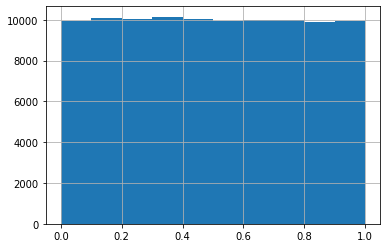

In [65]:
prior.hist()

In [66]:
def generative_model(param):

  result = np.random.binomial(50, param)
  return result

In [67]:
generative_model(0.13)

9

In [68]:
prior[0]

0.8766939793133686

In [69]:
generative_model(0.08373834693095616)

4

In [70]:
compraron = list()
for proba in prior:
  compraron.append(generative_model(proba))

In [71]:
compraron[0]

45

In [72]:
prior[:10]

0    0.876694
1    0.618614
2    0.125310
3    0.375088
4    0.143912
5    0.163135
6    0.526604
7    0.428181
8    0.621679
9    0.908131
dtype: float64

In [73]:
compraron[:10]

[45, 28, 6, 21, 13, 13, 26, 27, 30, 43]

In [74]:
posterior = prior[list(map(lambda x: x == 10, compraron))]

In [75]:
prior.head()

0    0.876694
1    0.618614
2    0.125310
3    0.375088
4    0.143912
dtype: float64

In [76]:
posterior

39       0.137158
80       0.230815
110      0.137489
113      0.166381
170      0.159891
           ...   
99651    0.253571
99673    0.181151
99735    0.192622
99760    0.214475
99999    0.335326
Length: 1928, dtype: float64

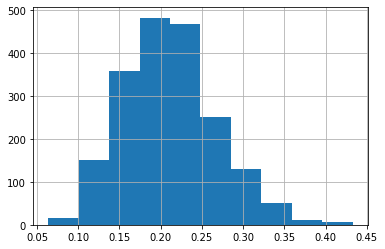

In [77]:
posterior.hist()

Binomial(n,p) \\
En este caso nuestro parámetro que estimaremos es p, ya depende del programmador saber qué siginifica, en caso de la binomial es la probabilidad de que un usuario compre.

---

Supongamos que abrimos una caseta en algún punto de la república y queremos modelar el número de automóviles que pasaran cada dia, sabemos que lo podemos modelar con una distribución $Poisson(\lambda)$ (número de éxitos en un tiempo o distancia fijos). \\
 Si tuvieramos el valor de $\lambda$ podríamos sacar muchas cosas entonces trataremos de estimarlo (recordemos que $\lambda$ será el promedio de autómoviles que pasaran por hora en la caseta)

In [2]:
# from google.colab import drive
# drive.mount("/content/drive")

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../datasets/Casetas.csv')

In [3]:
df.head()

,caseta,vehiculo,fecha
0,DB3,Auto,2018-03-17
1,PQ8,Auto,2019-11-22
2,UB7,Auto,2017-01-17
3,AA4,Auto,2017-03-30
4,TW3,Moto,2017-01-11


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531110 entries, 0 to 1531109
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   caseta    1531110 non-null  object
 1   vehiculo  1531110 non-null  object
 2   fecha     1531110 non-null  object
dtypes: object(3)
memory usage: 35.0+ MB


In [14]:
df.vehiculo.unique()

array(['Auto', 'Moto', '2/3/4', '5/6', 'ExCarga', 'ExLigero'],
      dtype=object)

In [15]:
df.fecha.unique()

array(['2018-03-17', '2019-11-22', '2017-01-17', ..., '2019-09-30',
       '2019-03-18', '2018-08-27'], dtype=object)

In [16]:
df.fecha = df.fecha.astype(np.datetime64)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531110 entries, 0 to 1531109
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   caseta    1531110 non-null  object        
 1   vehiculo  1531110 non-null  object        
 2   fecha     1531110 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 35.0+ MB


In [18]:
df.fecha.min()

Timestamp('2017-01-01 00:00:00')

In [19]:
df.fecha.max()

Timestamp('2019-12-31 00:00:00')

In [20]:
df.head()

,caseta,vehiculo,fecha
0,DB3,Auto,2018-03-17
1,PQ8,Auto,2019-11-22
2,UB7,Auto,2017-01-17
3,AA4,Auto,2017-03-30
4,TW3,Moto,2017-01-11


In [21]:
df_ord = df.sort_values(['caseta','fecha'])

In [22]:
#df_ord.head(20)

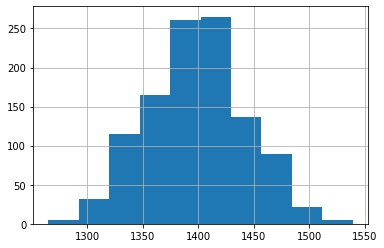

In [23]:
df_ord.value_counts('fecha').hist()

In [24]:
df_gb = df_ord.groupby(['caseta', 'fecha'], as_index=False).agg('count')

In [25]:
df_gb.head(5)

,caseta,fecha,vehiculo
0,AA2,2017-01-01,14
1,AA2,2017-01-02,7
2,AA2,2017-01-03,10
3,AA2,2017-01-04,14
4,AA2,2017-01-05,7


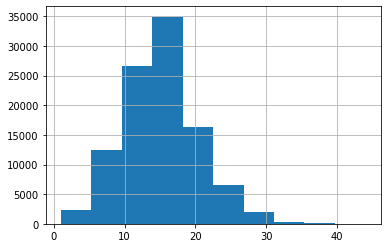

In [26]:
df_gb.vehiculo.hist()

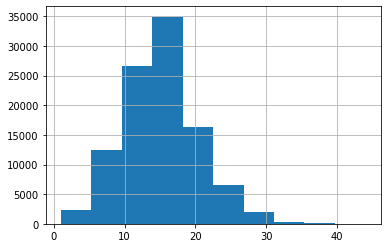

In [27]:
medias = df_gb.vehiculo
medias.hist()

In [37]:
medias.head()

0    14
1     7
2    10
3    14
4     7
Name: vehiculo, dtype: int64

Abrí la caseta y vi que pasaron 8 automoviles

In [38]:
parametros = medias

In [39]:
medias.values

array([14,  7, 10, ..., 11, 14, 11])

In [40]:
parametros.values

array([14,  7, 10, ..., 11, 14, 11])

In [41]:
def generative_model_poisson(param):

  result = np.random.poisson(param)
  return result

In [42]:
pasaron = list()
for l in parametros:
  pasaron.append(generative_model_poisson(l))

In [ ]:
pasaron[:10]

[17, 7, 13, 14, 8, 10, 9, 10, 3, 12]

In [44]:
posterior = parametros[list(map(lambda x: x==12, pasaron))]

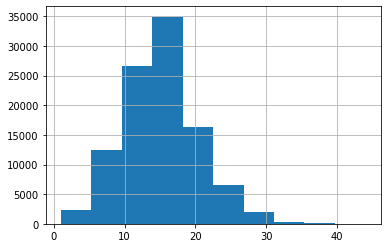

In [45]:
medias.hist()

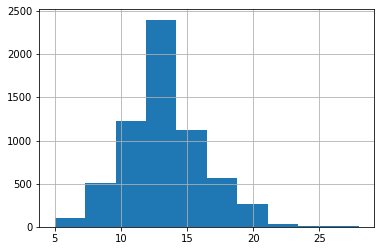

In [46]:
posterior.hist()

In [47]:
posterior.shape

(6241,)

In [78]:
posterior.describe()

count    1928.000000
mean        0.211297
std         0.056142
min         0.063676
25%         0.170130
50%         0.208407
75%         0.245370
max         0.432905
dtype: float64

In [79]:
# Intervalo de confianza del 95%
print(f'(-inf, {posterior.quantile(0.95)})')

(-inf, 0.31043594000911157)


In [80]:
# Intervalo de confianza del 95%
print(f'({posterior.quantile(0.05)}, inf)')

(0.12550324181101968, inf)


In [81]:
# Intervalo de confianza del 5%
print(f'({posterior.quantile(0.025)}, {posterior.quantile(0.975)})')

(0.11399313802951036, 0.3327078601268798)
